# Exploration of traffic flow data set

* Lets start with the detectors. UOA = detectors can measure multiple lines -> Link files
*

In [120]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx
import seaborn as sns
import numpy as np
import contextily as cx

In [121]:
det = gpd.read_file('data/detectors_public.csv')

det.head()

detid             length                pos     fclass   
0  U1-52G  0.196036689548578  0.005511921838942  secondary  \
1  U1-51G  0.130039071784385  0.004013209518671  secondary   
2  U1-52L  0.155863214591286  0.022227823915315  secondary   
3  U1-51L  0.197675412740605  0.021889369247481  secondary   
4   U1-62  0.065182655061287  0.024465133197684  secondary   

                 road limit  citycode lanes linkid        long         lat   
0  GÃ¶gginger StraÃŸe    50  augsburg     1     72  10.8895527   48.359957  \
1  GÃ¶gginger StraÃŸe    50  augsburg     1     73   10.889601  48.3599454   
2  GÃ¶gginger StraÃŸe    50  augsburg     1     70  10.8893555  48.3598759   
3  GÃ¶gginger StraÃŸe    50  augsburg     1     71  10.8893958  48.3598617   
4      RosenaustraÃŸe    50  augsburg     1     68  10.8893609  48.3605781   

  geometry  
0     None  
1     None  
2     None  
3     None  
4     None

In [122]:
det_gdf = gpd.GeoDataFrame(
    det, geometry=gpd.points_from_xy(det.long, det.lat), crs="EPSG:4326"
)
det_gdf.head()

detid             length                pos     fclass   
0  U1-52G  0.196036689548578  0.005511921838942  secondary  \
1  U1-51G  0.130039071784385  0.004013209518671  secondary   
2  U1-52L  0.155863214591286  0.022227823915315  secondary   
3  U1-51L  0.197675412740605  0.021889369247481  secondary   
4   U1-62  0.065182655061287  0.024465133197684  secondary   

                 road limit  citycode lanes linkid        long         lat   
0  GÃ¶gginger StraÃŸe    50  augsburg     1     72  10.8895527   48.359957  \
1  GÃ¶gginger StraÃŸe    50  augsburg     1     73   10.889601  48.3599454   
2  GÃ¶gginger StraÃŸe    50  augsburg     1     70  10.8893555  48.3598759   
3  GÃ¶gginger StraÃŸe    50  augsburg     1     71  10.8893958  48.3598617   
4      RosenaustraÃŸe    50  augsburg     1     68  10.8893609  48.3605781   

                    geometry  
0  POINT (10.88955 48.35996)  
1  POINT (10.88960 48.35995)  
2  POINT (10.88936 48.35988)  
3  POINT (10.88940 48.35986)  
4  POINT (10.88936 48.36058)

In [123]:
det_city = det_gdf.groupby('citycode')
det_city.count()[det_city.count()['detid']>500]


detid  length   pos  fclass  road  limit  lanes  linkid  long   
citycode                                                                     
augsburg       717     717   717     717   717    717    717     717   717  \
bern           755     755   755     755   755    755    755     755   755   
bremen         548     548   548     548   548    548    548     548   548   
kassel         513     513   513     513   513    513    513     513   513   
london        5719    5719  5719    5719  5719   5719   5719    5719  5719   
losanageles   1725    1725  1725    1725  1725   1725   1725    1725  1725   
madrid        1116    1116  1116    1116  1116   1116   1116    1116  1116   
melbourne     1630    1630  1630    1630  1630   1630   1630    1630  1630   
munich         520     520   520     520   520    520    520     520   520   
tokyo         1887    1887  1887    1887  1887   1887   1887    1887  1887   
utrecht       1072    1072  1072    1072  1072   1072   1072    1072  1072   
vilnius        581     581   581     581   581    581    581     581   581   
zurich        1020    1020  1020    1020  1020   1020   1020    1020  1020   

              lat  geometry  
citycode                     
augsburg      717       717  
bern          755       755  
bremen        548       548  
kassel        513       513  
london       5719      5719  
losanageles  1725      1725  
madrid       1116      1116  
melbourne    1630      1630  
munich        520       520  
tokyo        1887      1887  
utrecht      1072      1072  
vilnius       581       581  
zurich       1020      1020

In [124]:
det_gdf['citycode'].unique()

array(['augsburg', 'basel', 'bern', 'birmingham', 'bolton', 'bordeaux',
       'bremen', 'cagliari', 'constance', 'darmstadt', 'essen',
       'frankfurt', 'graz', 'groningen', 'hamburg', 'innsbruck', 'kassel',
       'london', 'losanageles', 'luzern', 'madrid', 'melbourne',
       'manchester', 'marseille', 'munich', 'paris', 'rotterdam',
       'santander', 'speyer', 'strasbourg', 'stuttgart', 'taipeh',
       'tokyo', 'torino', 'toronto', 'toulouse', 'utrecht', 'vilnius',
       'wolfsburg', 'zurich'], dtype=object)

## Here I want to do a quick and dirty casestudy on Utrecht
### Goals:
1. Show detectors.
2. Lanes they detect.
3. Explore for one detector the flow data

<Axes: >

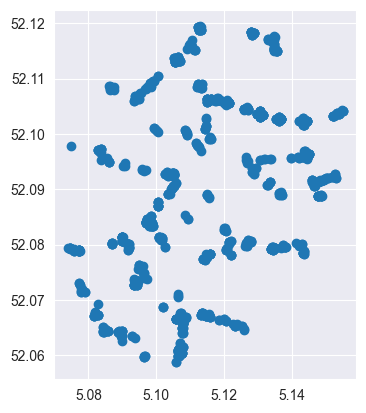

In [125]:
det_city.get_group('utrecht').plot()

Lets get the streets (links)

In [126]:
links = pd.read_csv('data/links.csv')
links_gdf = gpd.GeoDataFrame(
    links, geometry=gpd.points_from_xy(links.long, links.lat), crs="EPSG:4326"
)
links_gdf.head()

long        lat  order  piece  linkid  group  citycode   
0  10.891016  48.361079      1      1       0    0.1  augsburg  \
1  10.890894  48.360993      2      1       0    0.1  augsburg   
2  10.890642  48.360853      3      1       0    0.1  augsburg   
3  10.890404  48.360719      4      1       0    0.1  augsburg   
4  10.889994  48.360497      5      1       0    0.1  augsburg   

                    geometry  
0  POINT (10.89102 48.36108)  
1  POINT (10.89089 48.36099)  
2  POINT (10.89064 48.36085)  
3  POINT (10.89040 48.36072)  
4  POINT (10.88999 48.36050)

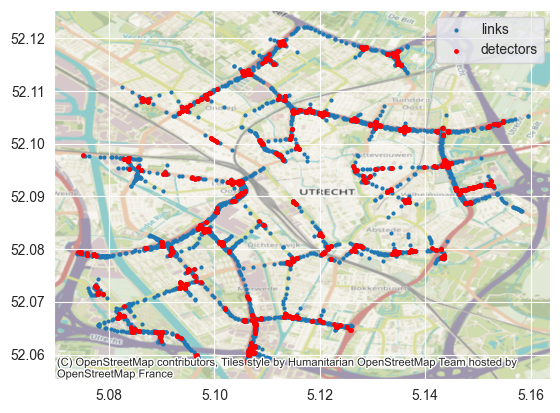

In [127]:
links_city = links_gdf.groupby('citycode')

fig, ax = plt.subplots(1,1)
links_city.get_group('utrecht').plot(ax = ax, markersize=4, label='links')
det_city.get_group('utrecht').plot(ax = ax, c='red',  markersize=6, label='detectors')
ctx.add_basemap(ax, crs=links_city.get_group('utrecht').crs)
plt.legend()


Challenge:
* Detector observations must be grouped by links. -> Observational unit = Links.
* Links must be mapped to Parking spots

## Preprocess the flow data

In [128]:
flow = pd.read_csv('data/utd19_u.csv')
flow.head()

C:\Users\admin\AppData\Local\Temp\ipykernel_31036\164034641.py:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  flow = pd.read_csv('data/utd19_u.csv')


day  interval     detid  flow  occ  error      city  speed
0  2017-05-06         0  06.X-2li  12.0  0.0    1.0  augsburg    NaN
1  2017-05-06       300  06.X-2li  12.0  0.0    1.0  augsburg    NaN
2  2017-05-06       600  06.X-2li  12.0  0.0    1.0  augsburg    NaN
3  2017-05-06       900  06.X-2li  16.0  0.0    1.0  augsburg    NaN
4  2017-05-06      1200  06.X-2li  16.0  0.0    1.0  augsburg    NaN

In [129]:
flow.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134380371 entries, 0 to 134380370
Data columns (total 8 columns):
 #   Column    Dtype  
---  ------    -----  
 0   day       object 
 1   interval  int64  
 2   detid     object 
 3   flow      float64
 4   occ       float64
 5   error     float64
 6   city      object 
 7   speed     float64
dtypes: float64(4), int64(1), object(3)
memory usage: 8.0+ GB


In [130]:
flow.isna().sum() /flow.shape[0]

day         0.000000
interval    0.000000
detid       0.000000
flow        0.000000
occ         0.024405
error       0.440492
city        0.000000
speed       0.965546
dtype: float64

Conclusion:
* speed almost no data entries occuring -> Leave out in analysis.

Further we have to ealier split the analysis into the cities of interest otherwise the analysis is not managable.

In [131]:
day_detect = flow.groupby(['city', 'detid'])['day'].nunique()
day_detect = day_detect.reset_index(name='count')

<Axes: ylabel='city'>

<Figure size 3000x1000 with 0 Axes>

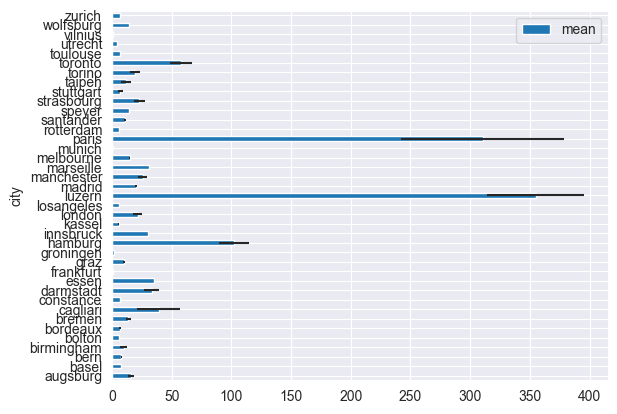

In [132]:
day_mean = day_detect.groupby('city')['count'].agg(['mean', 'std'])

plt.figure(figsize=(30,10))
day_mean.plot(kind='barh', xerr='std')

In [133]:
day_mean[day_mean['mean']>10].sort_values(by='mean', ascending=False)

mean        std
city                             
luzern      354.930380  40.654379
paris       310.502392  68.192891
hamburg     102.574163  12.610775
toronto      57.845745   8.989753
cagliari     39.394737  17.980548
essen        35.000000   0.000000
darmstadt    33.395408   6.177616
marseille    31.000000   0.000000
innsbruck    30.000000   0.000000
manchester   25.657459   3.650542
strasbourg   23.058442   4.560755
london       21.502186   3.436775
madrid       19.912343   0.948735
torino       19.370000   4.560713
augsburg     15.924264   2.406076
melbourne    14.976939   0.316547
speyer       14.000000   0.000000
wolfsburg    14.000000   0.000000
bremen       13.613139   2.124974
taipeh       11.937079   4.067626
santander    10.909502   0.858620
birmingham   10.115385   2.934941

In [134]:
cities_int = ['paris','taipeh', 'toronto', 'melbourne', 'hamburg', 'london' ]
day_mean.loc[cities_int, :]

mean        std
city                            
paris      310.502392  68.192891
taipeh      11.937079   4.067626
toronto     57.845745   8.989753
melbourne   14.976939   0.316547
hamburg    102.574163  12.610775
london      21.502186   3.436775

In [135]:
det_city = day_detect.groupby('city')['detid'].count()

det_city.sort_values(ascending=False)

city
london        5719
losangeles    1722
madrid        1118
utrecht       1027
zurich        1020
melbourne      954
bern           755
augsburg       713
vilnius        583
bremen         548
munich         521
kassel         505
toulouse       479
taipeh         445
bordeaux       425
hamburg        418
torino         400
darmstadt      392
graz           300
stuttgart      300
rotterdam      259
santander      221
paris          209
toronto        188
speyer         184
manchester     181
marseille      169
bolton         166
luzern         158
strasbourg     154
cagliari       152
wolfsburg      133
constance      122
frankfurt      112
basel           77
groningen       55
birmingham      52
essen           36
innsbruck       16
Name: detid, dtype: int64

In [136]:
det_sum = day_mean.merge(det_city, on='city')

plt.figure(figsize=(20,10))
det_sum.loc[cities_int,['mean', 'detid']]

mean  detid
city                        
paris      310.502392    209
taipeh      11.937079    445
toronto     57.845745    188
melbourne   14.976939    954
hamburg    102.574163    418
london      21.502186   5719

<Figure size 2000x1000 with 0 Axes>

In [137]:
# to make a decision I multiply number of detectors with number of measurement days. This will resolve the tradeoff partially
det_sum['det_day']= det_sum['mean'] * det_sum['detid']

det_sum.sort_values(by='det_day', ascending = False)

mean        std  detid   det_day
city                                              
london       21.502186   3.436775   5719  122971.0
paris       310.502392  68.192891    209   64895.0
luzern      354.930380  40.654379    158   56079.0
hamburg     102.574163  12.610775    418   42876.0
madrid       19.912343   0.948735   1118   22262.0
melbourne    14.976939   0.316547    954   14288.0
darmstadt    33.395408   6.177616    392   13091.0
augsburg     15.924264   2.406076    713   11354.0
toronto      57.845745   8.989753    188   10875.0
losangeles    5.959350   0.333274   1722   10262.0
torino       19.370000   4.560713    400    7748.0
bremen       13.613139   2.124974    548    7460.0
zurich        6.998039   0.062622   1020    7138.0
bern          7.982781   0.130171    755    6027.0
cagliari     39.394737  17.980548    152    5988.0
taipeh       11.937079   4.067626    445    5312.0
marseille    31.000000   0.000000    169    5239.0
manchester   25.657459   3.650542    181    4644.0
utrecht       3.992210   0.087958   1027    4100.0
strasbourg   23.058442   4.560755    154    3551.0
toulouse      7.000000   0.000000    479    3353.0
graz          9.850000   0.854361    300    2955.0
bordeaux      6.898824   0.721387    425    2932.0
kassel        5.647525   0.711665    505    2852.0
speyer       14.000000   0.000000    184    2576.0
santander    10.909502   0.858620    221    2411.0
stuttgart     6.953333   1.926185    300    2086.0
wolfsburg    14.000000   0.000000    133    1862.0
rotterdam     5.965251   0.333453    259    1545.0
essen        35.000000   0.000000     36    1260.0
bolton        6.000000   0.000000    166     996.0
constance     7.000000   0.000000    122     854.0
basel         8.000000   0.000000     77     616.0
vilnius       1.000000   0.000000    583     583.0
birmingham   10.115385   2.934941     52     526.0
munich        1.000000   0.000000    521     521.0
innsbruck    30.000000   0.000000     16     480.0
frankfurt     1.000000   0.000000    112     112.0
groningen     2.000000   0.000000     55     110.0

Hamburg scores better then Augsburg why it is exchanged.The final cities are: cities_int = ['paris','taipeh', 'toronto', 'melbourne', 'hamburg', 'london' ]

No we bin the flows into hourly averages. ... Good luck with that.

In [138]:
flow['interval'] = pd.to_numeric(flow['interval'], errors='coerce')

In [139]:
flow.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134380371 entries, 0 to 134380370
Data columns (total 8 columns):
 #   Column    Dtype  
---  ------    -----  
 0   day       object 
 1   interval  int64  
 2   detid     object 
 3   flow      float64
 4   occ       float64
 5   error     float64
 6   city      object 
 7   speed     float64
dtypes: float64(4), int64(1), object(3)
memory usage: 8.0+ GB


In [140]:
flow.head()

day  interval     detid  flow  occ  error      city  speed
0  2017-05-06         0  06.X-2li  12.0  0.0    1.0  augsburg    NaN
1  2017-05-06       300  06.X-2li  12.0  0.0    1.0  augsburg    NaN
2  2017-05-06       600  06.X-2li  12.0  0.0    1.0  augsburg    NaN
3  2017-05-06       900  06.X-2li  16.0  0.0    1.0  augsburg    NaN
4  2017-05-06      1200  06.X-2li  16.0  0.0    1.0  augsburg    NaN

In [141]:
flow['rounded_interval'] = (flow['interval'] // 3600) * 3600

flow.head()

day  interval     detid  flow  occ  error      city  speed   
0  2017-05-06         0  06.X-2li  12.0  0.0    1.0  augsburg    NaN  \
1  2017-05-06       300  06.X-2li  12.0  0.0    1.0  augsburg    NaN   
2  2017-05-06       600  06.X-2li  12.0  0.0    1.0  augsburg    NaN   
3  2017-05-06       900  06.X-2li  16.0  0.0    1.0  augsburg    NaN   
4  2017-05-06      1200  06.X-2li  16.0  0.0    1.0  augsburg    NaN   

   rounded_interval  
0                 0  
1                 0  
2                 0  
3                 0  
4                 0

In [142]:
# Group by 'detid' and 'rounded_interval', then calculate mean, std, and count
result_df = flow.groupby(['detid', 'rounded_interval'])['flow'].agg(['mean', 'std', 'count']).reset_index()

# Rename columns for clarity
result_df.columns = ['detid', 'interval', 'mean_flow', 'std_flow', 'count_flow']

In [143]:
result_df.head()

detid  interval   mean_flow    std_flow  count_flow
0     1         0  669.654597  864.538286        1229
1     1      3600  505.950773  781.726866        1229
2     1      7200  360.110578  622.615363        1229
3     1     10800  260.755735  470.697989        1226
4     1     14400  211.247286  317.837386        1230

In [144]:
result_df['interval'] = result_df['interval'] / 3600

In [145]:
result_df.tail()

detid  interval   mean_flow    std_flow  count_flow
480190  ig73FD498_D6_d1      19.0  392.142857  155.955998         280
480191  ig73FD498_D6_d1      20.0  268.000000   94.820714         280
480192  ig73FD498_D6_d1      21.0  209.714286   95.818996         280
480193  ig73FD498_D6_d1      22.0  131.142857   63.461508         280
480194  ig73FD498_D6_d1      23.0   73.000000   59.648913         280

In [146]:
result_sum = det_gdf.merge(result_df, left_on= 'detid', right_on='detid')

In [147]:
result_sum.head()

detid             length                pos     fclass   
0  U1-52G  0.196036689548578  0.005511921838942  secondary  \
1  U1-52G  0.196036689548578  0.005511921838942  secondary   
2  U1-52G  0.196036689548578  0.005511921838942  secondary   
3  U1-52G  0.196036689548578  0.005511921838942  secondary   
4  U1-52G  0.196036689548578  0.005511921838942  secondary   

                 road limit  citycode lanes linkid        long        lat   
0  GÃ¶gginger StraÃŸe    50  augsburg     1     72  10.8895527  48.359957  \
1  GÃ¶gginger StraÃŸe    50  augsburg     1     72  10.8895527  48.359957   
2  GÃ¶gginger StraÃŸe    50  augsburg     1     72  10.8895527  48.359957   
3  GÃ¶gginger StraÃŸe    50  augsburg     1     72  10.8895527  48.359957   
4  GÃ¶gginger StraÃŸe    50  augsburg     1     72  10.8895527  48.359957   

                    geometry  interval  mean_flow   std_flow  count_flow  
0  POINT (10.88955 48.35996)       0.0    62.1875  37.540711         192  
1  POINT (10.88955 48.35996)       1.0    47.5625  36.640839         192  
2  POINT (10.88955 48.35996)       2.0    37.5625  35.267360         192  
3  POINT (10.88955 48.35996)       3.0    34.6875  31.057222         192  
4  POINT (10.88955 48.35996)       4.0    39.9375  23.710211         192

In [148]:
result_sum.drop(columns= ['long','lat'], inplace = True)

In [149]:
result_sum['interval'] = result_sum['interval'].astype(int)

In [160]:
result_sum

detid             length                pos     fclass   
0       U1-52G  0.196036689548578  0.005511921838942  secondary  \
1       U1-52G  0.196036689548578  0.005511921838942  secondary   
2       U1-52G  0.196036689548578  0.005511921838942  secondary   
3       U1-52G  0.196036689548578  0.005511921838942  secondary   
4       U1-52G  0.196036689548578  0.005511921838942  secondary   
...        ...                ...                ...        ...   
409590  K38D11  0.176827929958034  0.152221761817854   tertiary   
409591  K38D11  0.176827929958034  0.152221761817854   tertiary   
409592  K38D11  0.176827929958034  0.152221761817854   tertiary   
409593  K38D11  0.176827929958034  0.152221761817854   tertiary   
409594  K38D11  0.176827929958034  0.152221761817854   tertiary   

                      road limit  citycode lanes linkid   
0       GÃ¶gginger StraÃŸe    50  augsburg     1     72  \
1       GÃ¶gginger StraÃŸe    50  augsburg     1     72   
2       GÃ¶gginger StraÃŸe    50  augsburg     1     72   
3       GÃ¶gginger StraÃŸe    50  augsburg     1     72   
4       GÃ¶gginger StraÃŸe    50  augsburg     1     72   
...                    ...   ...       ...   ...    ...   
409590      Badenerstrasse    50    zurich     1   1207   
409591      Badenerstrasse    50    zurich     1   1207   
409592      Badenerstrasse    50    zurich     1   1207   
409593      Badenerstrasse    50    zurich     1   1207   
409594      Badenerstrasse    50    zurich     1   1207   

                         geometry  interval   mean_flow   std_flow  count_flow  
0       POINT (10.88955 48.35996)         0   62.187500  37.540711         192  
1       POINT (10.88955 48.35996)         1   47.562500  36.640839         192  
2       POINT (10.88955 48.35996)         2   37.562500  35.267360         192  
3       POINT (10.88955 48.35996)         3   34.687500  31.057222         192  
4       POINT (10.88955 48.35996)         4   39.937500  23.710211         192  
...                           ...       ...         ...        ...         ...  
409590   POINT (8.51253 47.37743)        19  357.571429  94.586350         140  
409591   POINT (8.51253 47.37743)        20  292.142857  77.429808         140  
409592   POINT (8.51253 47.37743)        21  245.857143  75.312163         140  
409593   POINT (8.51253 47.37743)        22  225.000000  80.791943         140  
409594   POINT (8.51253 47.37743)        23  179.857143  92.774855         140  

[409595 rows x 14 columns]

In [155]:
result_sum.head()

detid             length                pos     fclass   
0  U1-52G  0.196036689548578  0.005511921838942  secondary  \
1  U1-52G  0.196036689548578  0.005511921838942  secondary   
2  U1-52G  0.196036689548578  0.005511921838942  secondary   
3  U1-52G  0.196036689548578  0.005511921838942  secondary   
4  U1-52G  0.196036689548578  0.005511921838942  secondary   

                 road limit  citycode lanes linkid                   geometry   
0  GÃ¶gginger StraÃŸe    50  augsburg     1     72  POINT (10.88955 48.35996)  \
1  GÃ¶gginger StraÃŸe    50  augsburg     1     72  POINT (10.88955 48.35996)   
2  GÃ¶gginger StraÃŸe    50  augsburg     1     72  POINT (10.88955 48.35996)   
3  GÃ¶gginger StraÃŸe    50  augsburg     1     72  POINT (10.88955 48.35996)   
4  GÃ¶gginger StraÃŸe    50  augsburg     1     72  POINT (10.88955 48.35996)   

   interval  mean_flow   std_flow  count_flow  
0         0    62.1875  37.540711         192  
1         1    47.5625  36.640839         192  
2         2    37.5625  35.267360         192  
3         3    34.6875  31.057222         192  
4         4    39.9375  23.710211         192

Lets do some GENERAL EDA

In [151]:
plot_df = result_sum.groupby(['citycode', 'interval' ])['mean_flow'].mean().reset_index()

In [152]:
plot_df[plot_df[plot_df.isin(cities_int)]]

ValueError: Boolean array expected for the condition, not object

In [ ]:
plt.figure(figsize=(20, 10))
sns.lineplot(data = plot_df[plot_df['citycode'].isin(cities_int)], x='interval', y= 'mean_flow', hue='citycode')
plt.title('Mean traffic flow (cars/h) for hours after midnight')

# Now lets start doing an proper EDA

In [161]:
df_geo = result_sum

In [162]:
cities_int = ['paris','taipeh', 'toronto', 'melbourne', 'hamburg', 'london' ]
hours_int = np.arange(7,19,1)

hours_int

array([ 7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18])

In [163]:
df_geo.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 409595 entries, 0 to 409594
Data columns (total 14 columns):
 #   Column      Non-Null Count   Dtype   
---  ------      --------------   -----   
 0   detid       409595 non-null  object  
 1   length      409595 non-null  object  
 2   pos         409595 non-null  object  
 3   fclass      409595 non-null  object  
 4   road        409595 non-null  object  
 5   limit       409595 non-null  object  
 6   citycode    409595 non-null  object  
 7   lanes       409595 non-null  object  
 8   linkid      409595 non-null  object  
 9   geometry    409595 non-null  geometry
 10  interval    409595 non-null  int32   
 11  mean_flow   409595 non-null  float64 
 12  std_flow    408641 non-null  float64 
 13  count_flow  409595 non-null  int64   
dtypes: float64(2), geometry(1), int32(1), int64(1), object(9)
memory usage: 42.2+ MB


In [164]:
df_int = df_geo[df_geo.interval.isin(hours_int)].groupby('detid')['mean_flow'].mean()

In [211]:
df_plot = df_geo.loc[:, ['detid', 'citycode', 'geometry']].merge(df_int, on='detid', how='left').drop_duplicates(['detid', 'citycode'], keep= 'first')

In [232]:
df_plot.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 17134 entries, 0 to 409571
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   detid      17134 non-null  object  
 1   citycode   17134 non-null  object  
 2   geometry   17134 non-null  geometry
 3   mean_flow  17132 non-null  float64 
dtypes: float64(1), geometry(1), object(2)
memory usage: 669.3+ KB


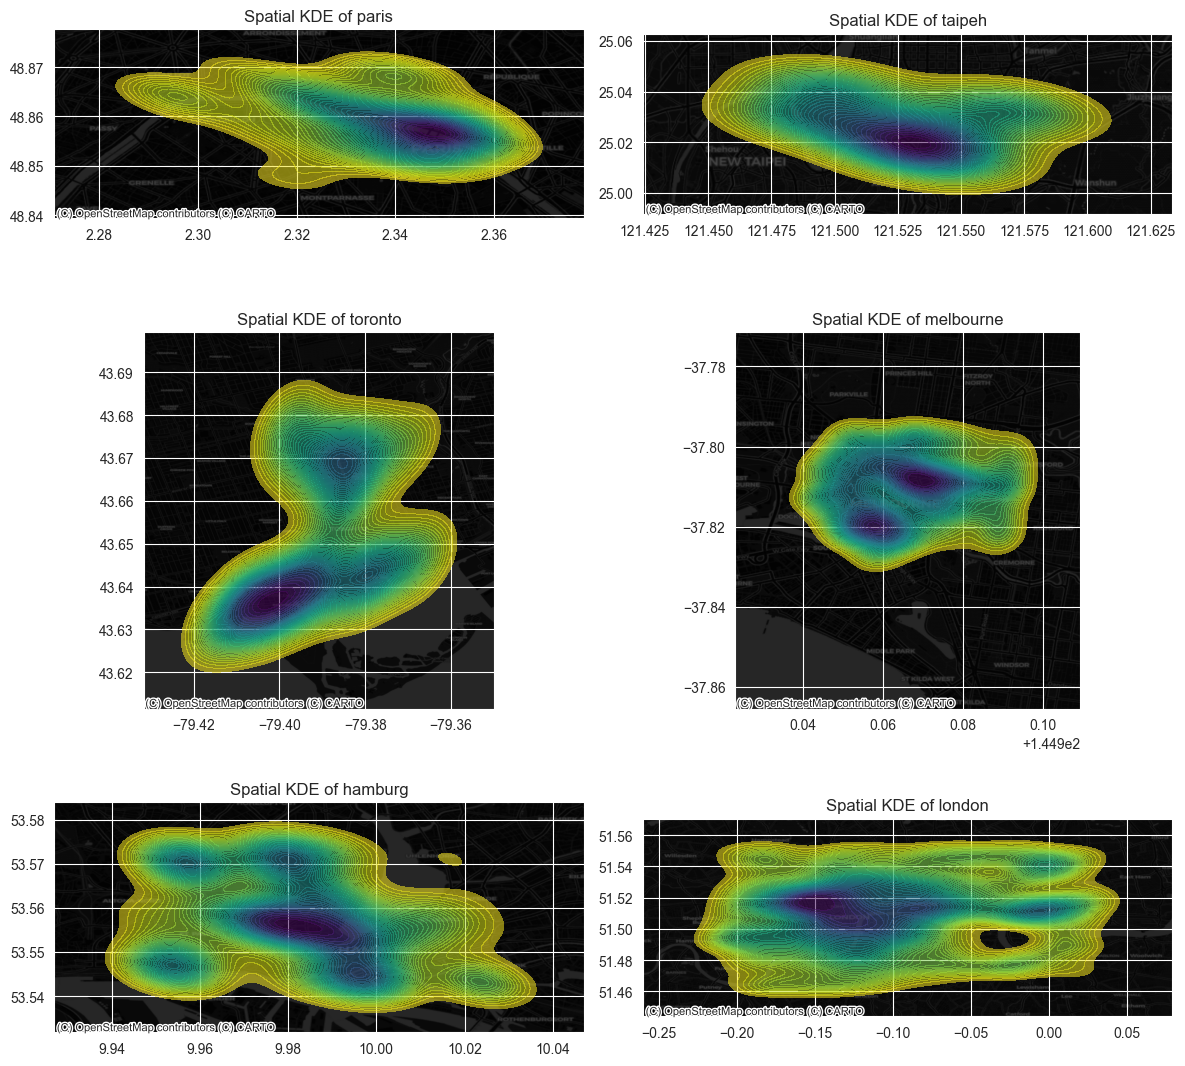

In [231]:
f, ax = plt.subplots(3, 2, figsize=(12, 12))

for i, city in enumerate(cities_int):
    # Add KDE layer that displays probability surface for GeoDataFrame
    sns.kdeplot(
        x=df_plot[df_plot['citycode'] == city]['geometry'].x,
        y=df_plot[df_plot['citycode'] == city]['geometry'].y,
        n_levels=50,
        fill=True,
        cmap='viridis_r',
        ax=ax[i // 2, i % 2],
        alpha = .55
        )

    # Add title of the map
    ax[i // 2, i % 2].set_title(f'Spatial KDE of {city}')

    # Remove axis
    #ax[i // 3, i % 3].set_axis_off()

    # Add basemap
    cx.add_basemap(
        ax=ax[i // 2, i % 2],
        crs=df_plot[df_plot['citycode'] == city].crs,
        source=cx.providers.CartoDB.DarkMatter
    )

# Show the plot outside of the loop
plt.tight_layout()

plt.savefig('fig/spatKde_cities.png')

plt.show()

In [247]:
df_plot.shape

(17134, 4)

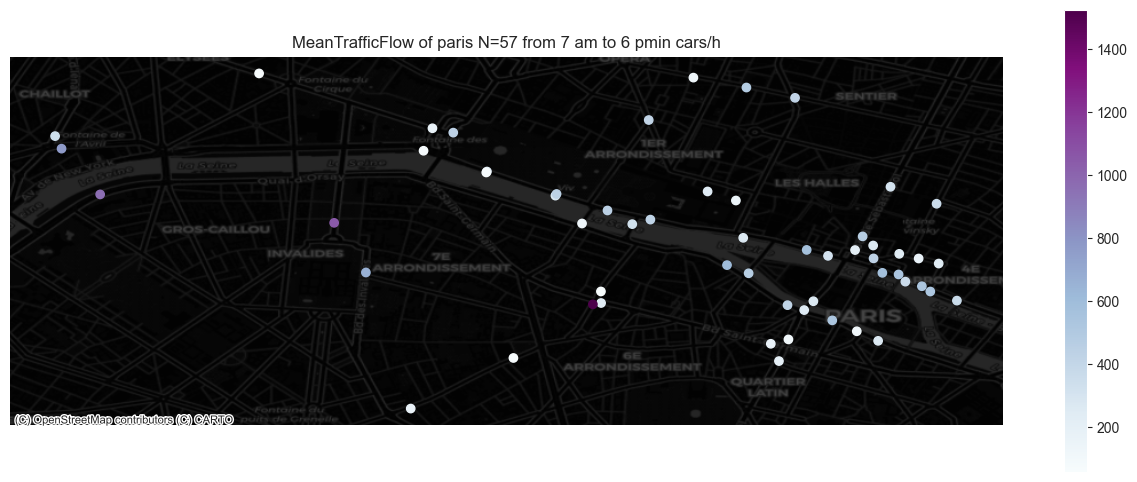

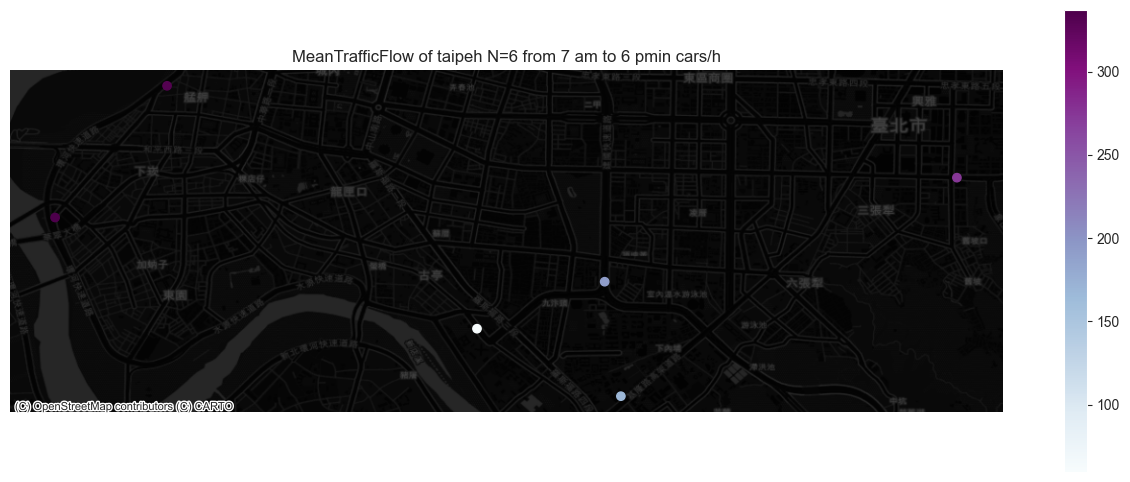

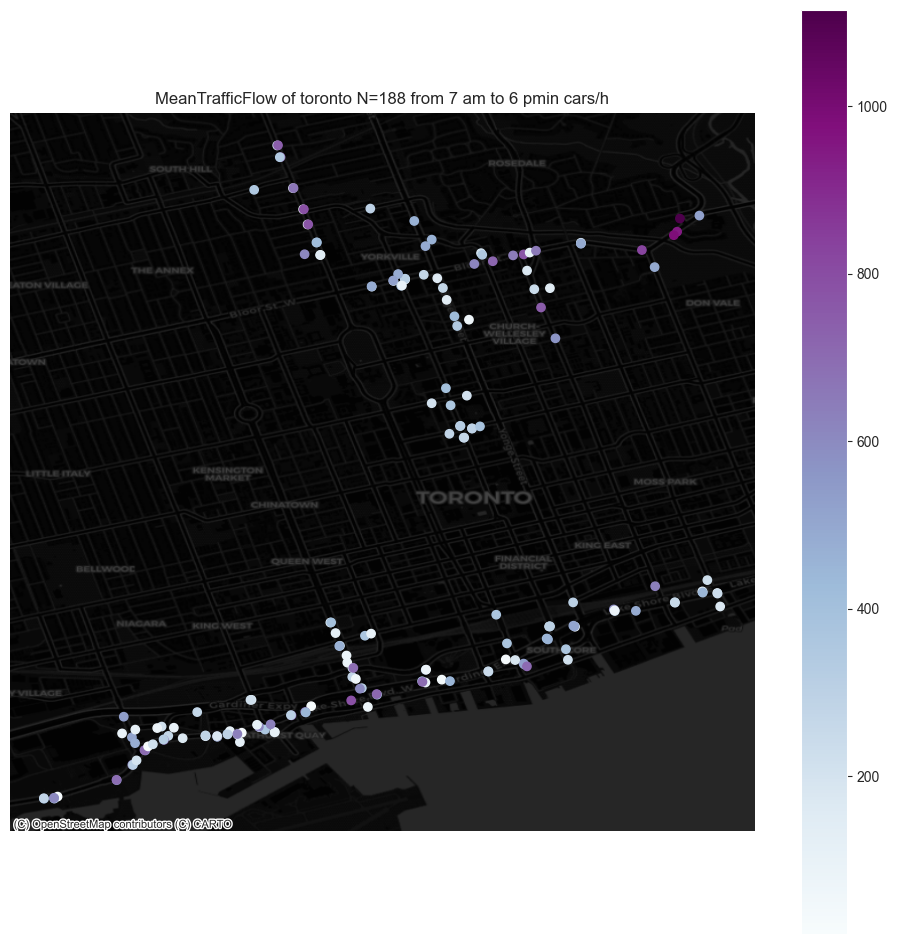

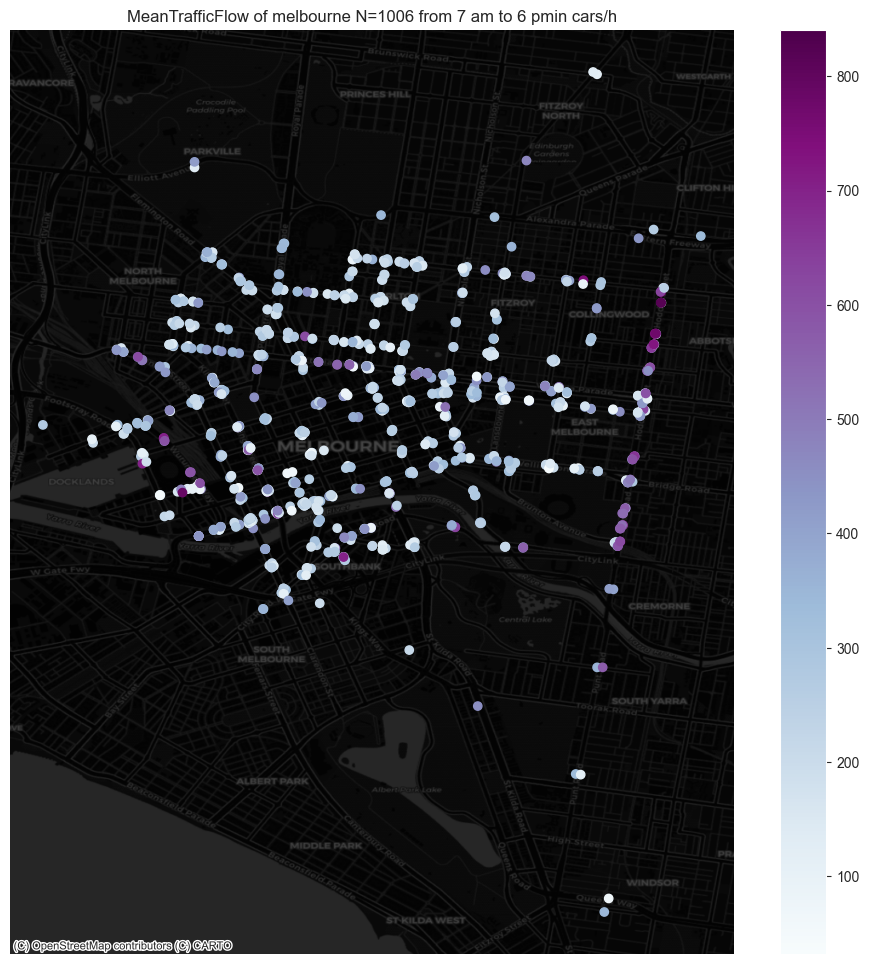

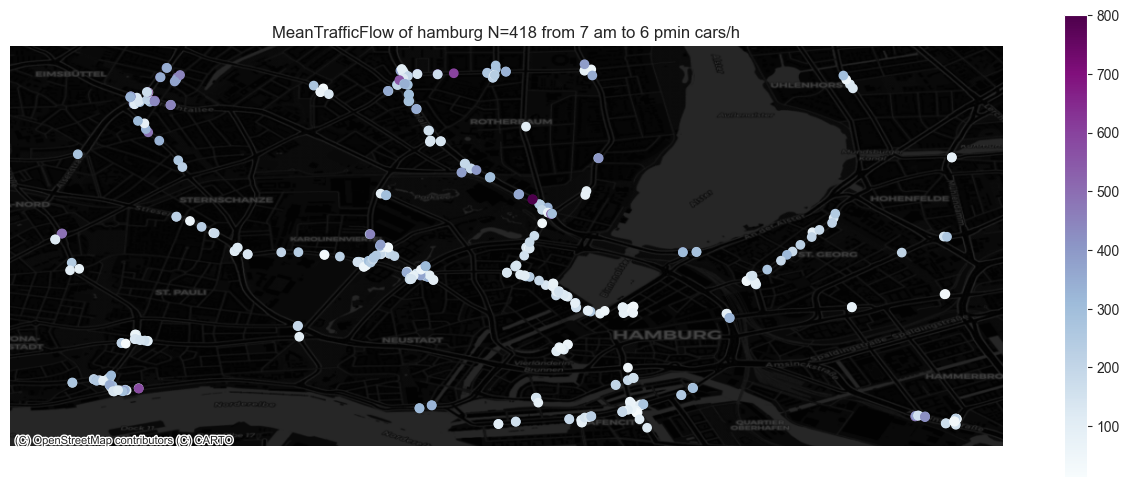

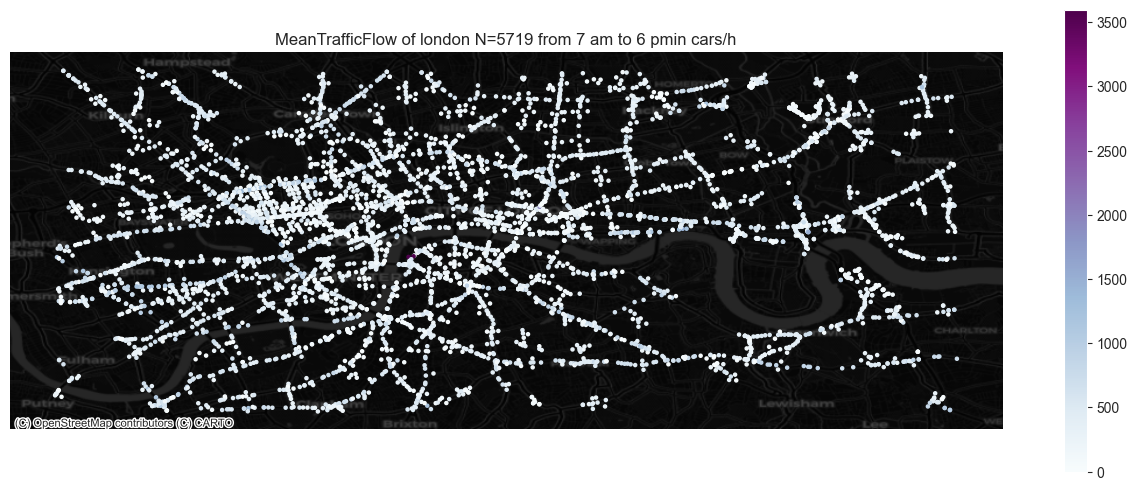

In [265]:


for i, city in enumerate(cities_int):
    n = df_plot[df_plot['citycode'] == city].shape[0]
    if city in ['paris', 'taipeh', 'london', 'hamburg']:
        size = (16,6)
    else:
        size = (12,12)


    f, ax = plt.subplots(1, figsize= size)

    df_plot[df_plot['citycode'] == city].plot(
        column ='mean_flow',
        ax=ax,
        cmap = 'BuPu',
        legend = True,
        s = 5 if city =='london'else None
    )
    # Add title of the map
    ax.set_title(f'MeanTrafficFlow of {city} '+f'N={n}'+' from 7 am to 6 pm'+'in cars/h')

    # Remove axis
    ax.set_axis_off()

    # Add basemap
    cx.add_basemap(
        ax=ax,
        crs=df_plot[df_plot['citycode'] == city].crs,
        source=cx.providers.CartoDB.DarkMatter
    )
    n = df_plot[df_plot['citycode'] == city].shape[0]

    plt.savefig(f'fig/Colorpleth_{city} '+f'N={n}')

    plt.show()

It can be concluded that London Melbourn Hamburg and London show quite a lot detectors. Especially for taipeh and paris there a possible substitution is needed. ... However it could be also sufficient to simply drop taipeh.


In [264]:
# todo : 1. analyse spatial clustering -> Spatial lag + LISA
# todo : 2. Discussion Taipeh -> cut off or substitution
# todo : 3. Do a proper export of the database